In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Reviews.csv" , index_col=0)
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
data = data.drop(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], axis=1)
data.head()

,Score,Text
Id,,
1,5,I have bought several of the Vitality canned d...
2,1,Product arrived labeled as Jumbo Salted Peanut...
3,4,This is a confection that has been around a fe...
4,2,If you are looking for the secret ingredient i...
5,5,Great taffy at a great price. There was a wid...


In [6]:
# Checking for the missing values
count_NaN = data.isna().sum()
count_NaN

Score    0
Text     0
dtype: int64

In [7]:
# Lower Character all the Texts
data['Text'] = data['Text'].str.lower()
data['Text'].head()

Id
1    i have bought several of the vitality canned d...
2    product arrived labeled as jumbo salted peanut...
3    this is a confection that has been around a fe...
4    if you are looking for the secret ingredient i...
5    great taffy at a great price.  there was a wid...
Name: Text, dtype: object

In [8]:
import re
def remove_punctuations_numbers(inputs):
    return re.sub(r'[^a-zA-Z]', ' ', inputs)


data['Text'] = data['Text'].apply(remove_punctuations_numbers)

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [10]:
def tokenization(inputs):  
    return word_tokenize(inputs)


data['text_tokenized'] = data['Text'].apply(tokenization)
data['text_tokenized'].head()

Id
1    [i, have, bought, several, of, the, vitality, ...
2    [product, arrived, labeled, as, jumbo, salted,...
3    [this, is, a, confection, that, has, been, aro...
4    [if, you, are, looking, for, the, secret, ingr...
5    [great, taffy, at, a, great, price, there, was...
Name: text_tokenized, dtype: object

In [11]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')


def stopwords_remove(inputs):  # Ref.2
    return [k for k in inputs if k not in stop_words]


data['text_stop'] = data['text_tokenized'].apply(stopwords_remove)
data['text_stop'].head()

Id
1    [bought, several, vitality, canned, dog, food,...
2    [product, arrived, labeled, jumbo, salted, pea...
3    [confection, around, centuries, light, pillowy...
4    [looking, secret, ingredient, robitussin, beli...
5    [great, taffy, great, price, wide, assortment,...
Name: text_stop, dtype: object

In [12]:
lemmatizer = WordNetLemmatizer()


def lemmatization(inputs):  # Ref.1
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]


data['text_lemmatized'] = data['text_stop'].apply(lemmatization)
data['text_lemmatized'].head()

Id
1    [buy, several, vitality, can, dog, food, produ...
2    [product, arrive, label, jumbo, salt, peanuts,...
3    [confection, around, centuries, light, pillowy...
4    [look, secret, ingredient, robitussin, believe...
5    [great, taffy, great, price, wide, assortment,...
Name: text_lemmatized, dtype: object

In [13]:
# Removing Words less than length 2
def remove_less_than_2(inputs):  # Ref.1
    return [j for j in inputs if len(j) > 2]


data['final'] = data['text_lemmatized'].apply(remove_less_than_2)

In [14]:
# Joining Tokens into Sentences
data['final'] = data['final'].str.join(' ')
data['final'].head()

Id
1    buy several vitality can dog food products fin...
2    product arrive label jumbo salt peanuts peanut...
3    confection around centuries light pillowy citr...
4    look secret ingredient robitussin believe find...
5    great taffy great price wide assortment yummy ...
Name: final, dtype: object

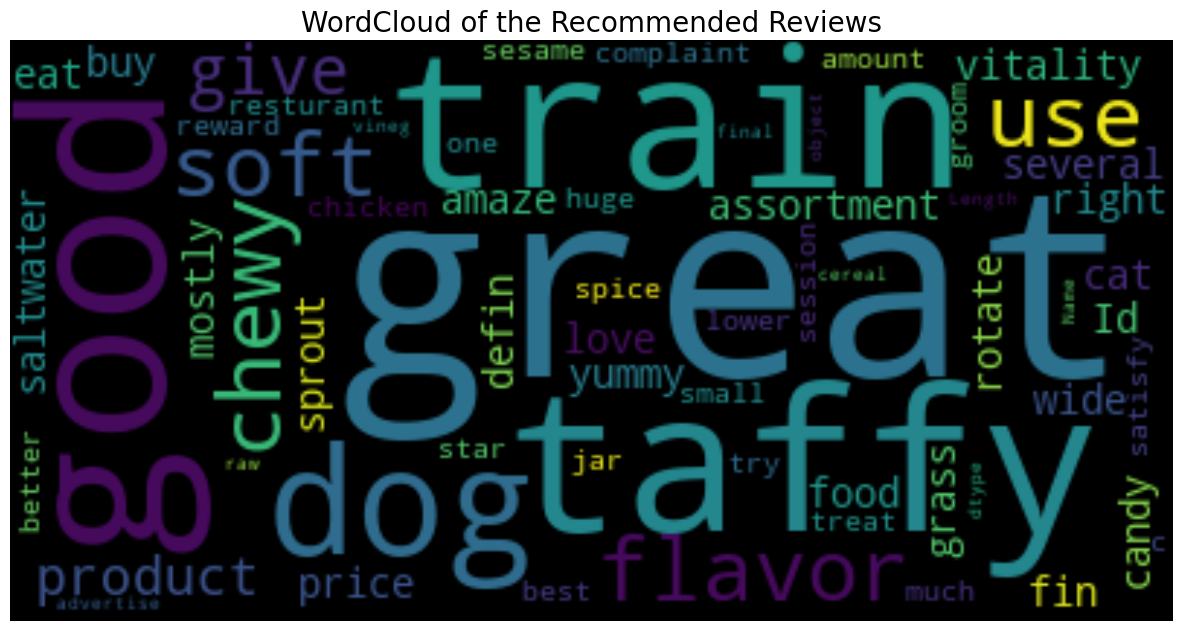

In [16]:
from wordcloud import WordCloud
data_recommended = data[data['Score'] == 5]  # Dataframe that only includes recommended reviews

WordCloud_recommended = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True).generate(str((data_recommended['final'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_recommended, interpolation='bilinear')
plt.title('WordCloud of the Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

In [17]:
data["Score"] = data["Score"].apply(lambda x: 0 if x < 3 else 1)
data.head()

,Score,Text,text_tokenized,text_stop,text_lemmatized,final
Id,,,,,,
1,1,i have bought several of the vitality canned d...,"[i, have, bought, several, of, the, vitality, ...","[bought, several, vitality, canned, dog, food,...","[buy, several, vitality, can, dog, food, produ...",buy several vitality can dog food products fin...
2,0,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, as, jumbo, salted,...","[product, arrived, labeled, jumbo, salted, pea...","[product, arrive, label, jumbo, salt, peanuts,...",product arrive label jumbo salt peanuts peanut...
3,1,this is a confection that has been around a fe...,"[this, is, a, confection, that, has, been, aro...","[confection, around, centuries, light, pillowy...","[confection, around, centuries, light, pillowy...",confection around centuries light pillowy citr...
4,0,if you are looking for the secret ingredient i...,"[if, you, are, looking, for, the, secret, ingr...","[looking, secret, ingredient, robitussin, beli...","[look, secret, ingredient, robitussin, believe...",look secret ingredient robitussin believe find...
5,1,great taffy at a great price there was a wid...,"[great, taffy, at, a, great, price, there, was...","[great, taffy, great, price, wide, assortment,...","[great, taffy, great, price, wide, assortment,...",great taffy great price wide assortment yummy ...


In [19]:
y = data['Score']
X = data['final']

X.head()

Id
1    buy several vitality can dog food products fin...
2    product arrive label jumbo salt peanuts peanut...
3    confection around centuries light pillowy citr...
4    look secret ingredient robitussin believe find...
5    great taffy great price wide assortment yummy ...
Name: final, dtype: object

In [20]:
from sklearn.model_selection import train_test_split
# Train-Test-Validation Split
x, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=13)  # Test: %20

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=13)  # Val: %20

print('Shape of the X_train:', X_train.shape)
print('Shape of the X_test:', X_test.shape)
print('Shape of the X_val:', X_val.shape)
print('--'*20)
print('Shape of the y_train:', y_train.shape)
print('Shape of the y_test:', y_test.shape)
print('Shape of the y_val:', y_val.shape)

Shape of the X_train: (341072,)
Shape of the X_test: (113691,)
Shape of the X_val: (113691,)
----------------------------------------
Shape of the y_train: (341072,)
Shape of the y_test: (113691,)
Shape of the y_val: (113691,)


In [21]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import numpy as np
import re
import plotly.express as px
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.layers import GlobalAvgPool1D
import tensorflow as tf

In [26]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

Tokenized_train = tokenizer.texts_to_sequences(X_train)
Tokenized_val = tokenizer.texts_to_sequences(X_val)

In [27]:
maxlen = 50
Padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='pre')
Padded_val = pad_sequences(Tokenized_val, maxlen=maxlen, padding='pre')

In [28]:
# Creating the Model
model = Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(Dropout(0.2))

model.add(GlobalAvgPool1D())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

opt = tf.optimizers.Adam(lr=0.55e-3)  # Learning Rate

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 dropout (Dropout)           (None, 50, 16)            0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
__________________________________________________

In [ ]:
# Training the Model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=5,
                                                  restore_best_weights=True)

epochs = 1
hist = model.fit(Padded_train, y_train, epochs=epochs,
                 validation_data=(Padded_val, y_val),
                 callbacks=[early_stopping], batch_size=32)